### Importing necessary libraries and modules to work with MNIST data set and to build CNN model.

In [1]:
from keras.datasets import mnist         # Import the MNIST dataset from Keras
import matplotlib.pyplot as plt         # Import matplotlib for visualization
import os                               # Import os for system-related operations
import numpy as np                      # Import numpy for numerical operations
from keras.models import Sequential     # Import Sequential model from Keras
from keras.layers import Dense, Conv2D, Flatten  # Import specific layers from Keras

### Loading the MNIST dataset and separating it into two sets: one for training the model and the other for testing it.
### Y_test[i] represents the true label of the X_test[i] image. In this case the Y equals to the digit in the image of X.

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### Displaying the first image in the training set

AxesImage(size=(28, 28))


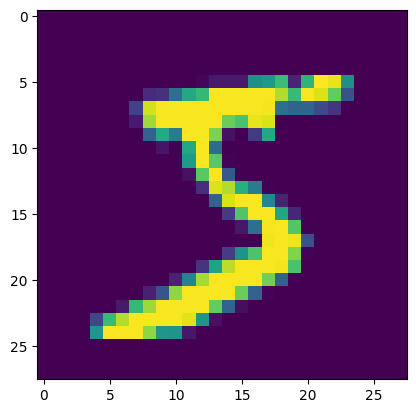

In [3]:
print(plt.imshow(X_train[0]))

### Printing the shape of the first image in the training set and providing information about its dimensions.

In [4]:
print('SHAPE X_train:', X_train[0].shape)

SHAPE X_train: (28, 28)


### converting the images from a 2D format to a 4D format enabling them to be processed by the convolutional neural network model.

In [5]:
print(type(X_train)) #numpy array
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

<class 'numpy.ndarray'>


In [6]:
from keras.utils import to_categorical

### Converting the labels into categorical format where each label is represented by a binary array of 0s and 1s

In [7]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### Printing the categorical representation of the first label in Y_train

In [8]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Creating a sequential model for image classification. It consists of two convolutional layers with ReLU activation, followed by flattening the output and adding a fully connected layer with softmax activation for classifying into 10 categories.

In [9]:
model = Sequential()

In [10]:
#Adding a convolutional layer to the model. It has 64 filters, a kernel size of 3x3, and uses the ReLU activation function.
#The input_shape parameter specifies the shape of the input images as 28x28 with a single channel.
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))) 

#Adds another convolutional layer to the model. It has 32 filters, a kernel size of 3x3, and uses the ReLU activation function.
model.add(Conv2D(32, kernel_size=3, activation='relu'))

#Adding a flatten layer to the model. It takes the output from the previous convolutional layer and flattens it into a 1D vector.
#This is necessary to connect the convolutional layers to the fully connected layers.
model.add(Flatten())

#adds a fully connected layer to the model. It has 10 neurons, corresponding to the 10 categories/classes in the dataset.
#The activation function used is softmax, which produces a probability distribution over the classes, indicating the likelihood of each class.
model.add(Dense(10, activation='softmax'))

### Configuring the model for training by specifying the optimizer, loss function, and evaluation metrics.

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###Training the model over 3 epochs with a batch size of 5000.

In [12]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3, batch_size=5000)

Epoch 1/3
12/12 [==============================] - 215s 18s/step - loss: 12.4575 - accuracy: 0.4523 - val_loss: 0.9296 - val_accuracy: 0.7057
Epoch 2/3
12/12 [==============================] - 226s 19s/step - loss: 0.5381 - accuracy: 0.8299 - val_loss: 0.3156 - val_accuracy: 0.9056
Epoch 3/3
12/12 [==============================] - 223s 19s/step - loss: 0.2596 - accuracy: 0.9219 - val_loss: 0.1926 - val_accuracy: 0.9433


In [19]:
predictions = model.predict(X_test[:4])

1/1 [==============================] - 0s 24ms/step


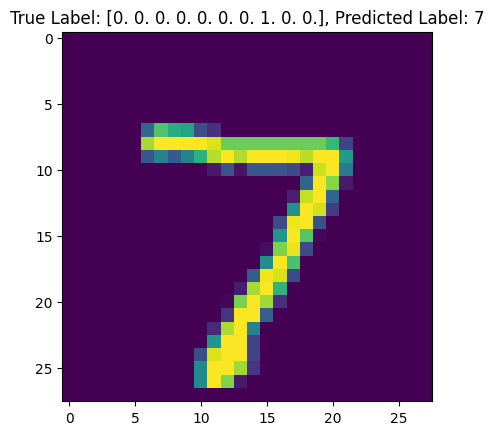

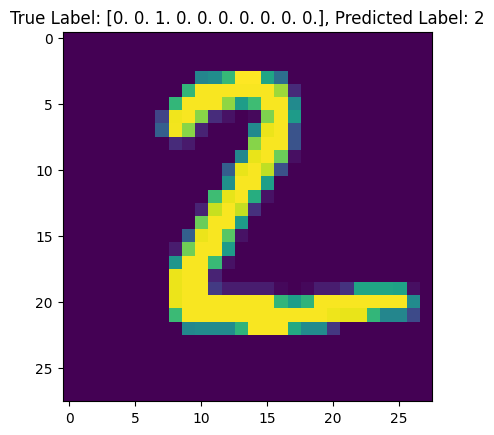

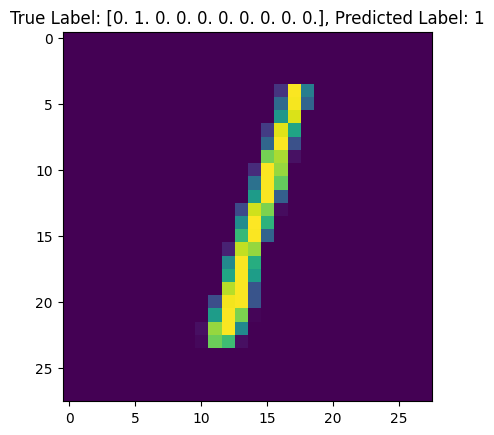

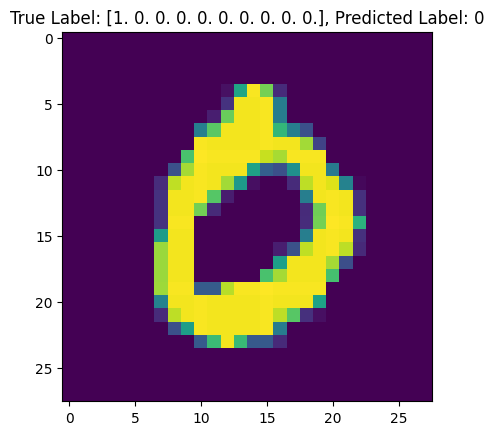

In [21]:
for i in range(4):
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title('True Label: {}, Predicted Label: {}'.format(Y_test[i], np.argmax(predictions[i])))
    plt.show()